In [2]:
from diffusers import DDPMScheduler, PNDMScheduler, StableDiffusionControlNetImg2ImgPipeline, ControlNetModel

/home/rmuproject/rmuproject/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import torch
# Load the pipeline and components
controlnet_id = "lllyasviel/control_v11f1e_sd15_tile"
model_id = "runwayml/stable-diffusion-v1-5"

controlnet = ControlNetModel.from_pretrained(controlnet_id, torch_dtype=torch.float16)
pipeline = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
    model_id, controlnet=controlnet,)
pipeline = pipeline.to("cuda")
pipeline.enable_model_cpu_offload()

An error occurred while trying to fetch lllyasviel/control_v11f1e_sd15_tile: lllyasviel/control_v11f1e_sd15_tile does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 12.17it/s]


In [1]:
# !pip install opencv-python transformers accelerate
from diffusers import StableDiffusionControlNetImg2ImgPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import numpy as np
import torch

import cv2
from PIL import Image



# load control net and stable diffusion v1-5
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16, safety_prompts=False
)

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

/home/rmuproject/rmuproject/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Keyword arguments {'safety_prompts': False} are not expected by StableDiffusionControlNetImg2ImgPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]


100%|██████████| 16/16 [00:10<00:00,  1.46it/s]


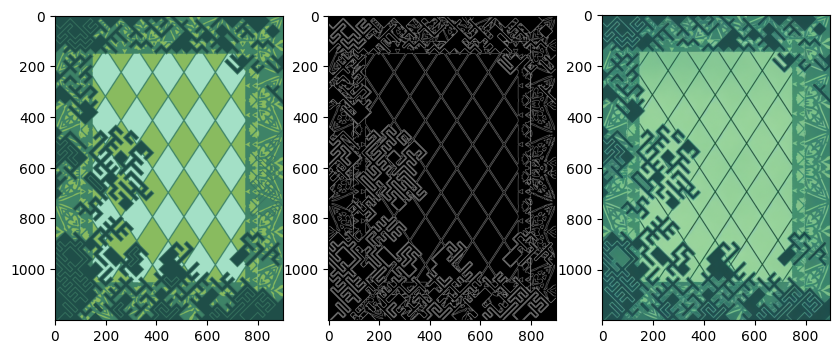

In [2]:
# download an image
image1 = Image.open("/home/rmuproject/rmuproject/users/sandesh/renders/Input/input_50.png").convert("RGB")
np_image = np.array(image1)

# get canny image
np_image = cv2.Canny(np_image, 100, 200)
np_image = np_image[:, :, None]
np_image = np.concatenate([np_image, np_image, np_image], axis=2)
canny_image = Image.fromarray(np_image)
# generate image
generator = torch.manual_seed(42)
image = pipe(
    "Generate",
    num_inference_steps=20,
    generator=generator,
    image=image1,
    control_image=canny_image,

).images[0]
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(np.array(image1))
ax[2].imshow(np.array(image))
ax[1].imshow(np.array(canny_image))
plt.show()


In [3]:
from diffusers import StableDiffusionImageVariationPipeline
model_id = "/home/rmuproject/rmuproject/users/sandesh/models/80_epochs"
pipeline = StableDiffusionImageVariationPipeline.from_pretrained(model_id)
device = "cuda" if torch.cuda.is_available() else "cpu"
pipeline.to(device)
pipeline.enable_model_cpu_offload()
width, height = image.size
seed = 42
num_variations = 5
generator = torch.Generator(device="cuda").manual_seed(seed)
alphabets = ['a', 'b', 'c', 'd', 'e']
generated_images = []
for _ in range(num_variations):
    images = pipeline(
        image=image,
        num_inference_steps=50,  # Number of diffusion steps
        guidance_scale=2.5,  # Scale for conditional guidance
        generator=generator
    ).images
    generated_images.append(images[0])

for j, img in enumerate(generated_images):
        # Resize the generated images to the output dimension
        resized_image = img.resize((width, height))
        resized_image.save(f"/home/rmuproject/rmuproject/users/sandesh/output{alphabets[j]}.png")
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(1, 3, figsize=(10, 5))
# ax[0].imshow(np.array(image1))
# ax[2].imshow(np.array(image.resize((900, 1080))))
# ax[1].imshow(np.array(canny_image))

Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00, 16.00it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_image_variation.StableDiffusionImageVariationPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
100%|██████████| 50/50 [00:12<00:00,  4.07it/s]


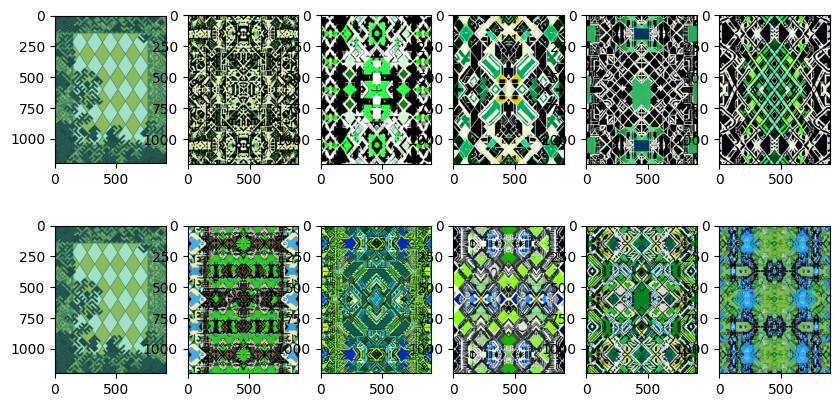

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 6, figsize=(10, 5))
ax[0, 0].imshow(np.array(image1))
ax[0, 1].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/outputa.png")))
ax[0, 2].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/outputb.png")))
ax[0, 3].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/outputc.png")))
ax[0, 4].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/outputd.png")))
ax[0, 5].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/outpute.png")))
# ax[0].title('2 pipeline infer')
ax[1, 0].imshow(np.array(image1))
ax[1, 1].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/renders/Output/output_50a.png")))
ax[1, 2].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/renders/Output/output_50b.png")))
ax[1, 3].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/renders/Output/output_50c.png")))
ax[1, 4].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/renders/Output/output_50d.png")))
ax[1, 5].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/renders/Output/output_50e.png")))
# ax[1].title('1 pipeline infer')
plt.show()